# **Object Recognition**

---



## **Using KNN**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.datasets import cifar10

### **Loading and Preprocessing CIFAR-10 Dataset**

---

Loads the CIFAR-10 dataset into training and testing sets and flatten the labels,  converts them into 1D arrays, which are easier to use with sklearn classifiers.

In [ ]:
# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Flatten labels (Convert from shape (n,1) to (n,))
y_train = y_train.flatten()
y_test = y_test.flatten()

print("Train Data Shape:", x_train.shape)  # (50000, 32, 32, 3)
print("Test Data Shape:", x_test.shape)    # (10000, 32, 32, 3)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Train Data Shape: (50000, 32, 32, 3)
Test Data Shape: (10000, 32, 32, 3)


### **Normalizing and Flattening Image Data**

---

Normalizes pixel values from the range (0-255) to (0-1) for better numerical stability.

In [ ]:
# Normalize pixel values (0-255) to (0-1)
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Reshape images into 1D vectors (Flattening)
x_train_flat = x_train.reshape(x_train.shape[0], -1)  # (50000, 3072)
x_test_flat = x_test.reshape(x_test.shape[0], -1)      # (10000, 3072)

print("New Shape:", x_train_flat.shape)  # (50000, 3072)


New Shape: (50000, 3072)


### **Training and Predicting with KNN**

---

Defines a KNN classifier with 7 neighbors, using Manhattan distance to measure similarity. Trains the model on the flattened CIFAR-10 dataset and predicts labels for the test set.

In [ ]:
# Define KNN Classifier
knn = KNeighborsClassifier(n_neighbors=7, metric='manhattan')

# Train the model
knn.fit(x_train_flat, y_train)

# Predict on test data
y_pred = knn.predict(x_test_flat)

In [ ]:
# Compute Accuracy
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"KNN Accuracy: {accuracy:.2f}%")

KNN Accuracy: 37.64%


### **Tests KNN with multiple k values**

In [ ]:
import matplotlib.pyplot as plt

# Try different k values
k_values = [1, 3, 5, 7, 9, 11, 13]
accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, metric='manhattan')
    knn.fit(x_train_flat, y_train)
    y_pred = knn.predict(x_test_flat)
    acc = accuracy_score(y_test, y_pred) * 100
    accuracies.append(acc)
    print(f"Accuracy with k={k}: {acc:.2f}%")

# Plot accuracy vs. k values
plt.figure(figsize=(8, 5))
plt.bar(k_values, accuracies, color='skyblue')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy (%)")
plt.title("KNN Accuracy for Different k Values")
plt.xticks(k_values)
plt.show()


Accuracy with k=1: 38.59%
Accuracy with k=3: 36.25%
Accuracy with k=5: 37.70%
Accuracy with k=7: 37.64%


### **Class-wise Accuracy**

---



The classification report shows precision, recall, and F1-score for each class, helping identify which categories the model struggles with the most.

* High precision = fewer false positives
* High recall = fewer false negatives
* Higher F1-score = better overall performance (balance between precision and recall)

In [ ]:
from sklearn.metrics import classification_report

# CIFAR-10 class labels
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Print class-wise accuracy
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))


Classification Report:

              precision    recall  f1-score   support

    Airplane       0.40      0.58      0.47      1000
  Automobile       0.66      0.26      0.37      1000
        Bird       0.24      0.46      0.32      1000
         Cat       0.32      0.23      0.27      1000
        Deer       0.26      0.51      0.34      1000
         Dog       0.45      0.26      0.33      1000
        Frog       0.40      0.29      0.34      1000
       Horse       0.70      0.26      0.38      1000
        Ship       0.44      0.68      0.54      1000
       Truck       0.74      0.23      0.35      1000

    accuracy                           0.38     10000
   macro avg       0.46      0.38      0.37     10000
weighted avg       0.46      0.38      0.37     10000



### **Visualizing KNN Predictions on CIFAR-10**

---



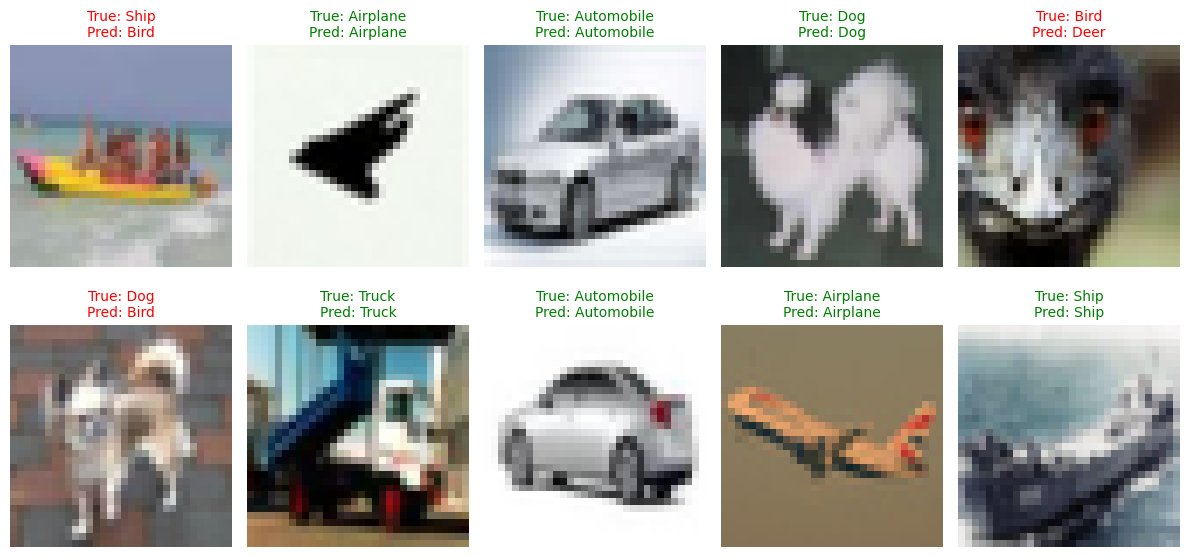

In [ ]:
# Select random test images
num_images = 10  # Number of images to display
indices = np.random.choice(len(x_test), num_images, replace=False)  # Random indices
selected_images = x_test[indices]
true_labels = y_test[indices]
predicted_labels = y_pred[indices]

# Plot the images with predictions
plt.figure(figsize=(12, 6))
for i in range(num_images):
    plt.subplot(2, 5, i + 1)  # Create a 2-row, 5-column subplot
    plt.imshow(selected_images[i])  # Show the image
    plt.axis('off')  # Hide axes
    plt.title(f"True: {class_names[true_labels[i]]}\nPred: {class_names[predicted_labels[i]]}",
              fontsize=10, color="green" if true_labels[i] == predicted_labels[i] else "red")

plt.tight_layout()
plt.show()

### **Confusion Matrix**

---

Showing misclassified classes.

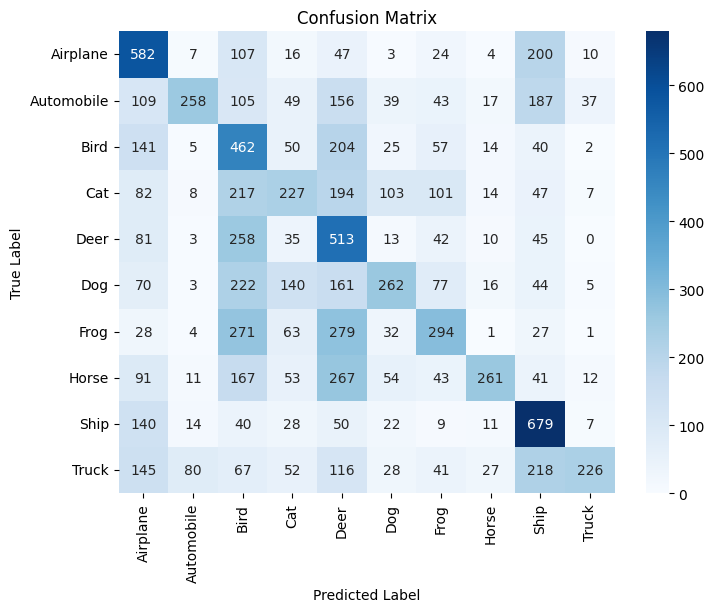

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()


In [ ]:
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"KNN Accuracy: {accuracy:.2f}%")

KNN Accuracy: 37.64%


### **Why is the Accuracy Low?**
* High Dimensionality (Curse of Dimensionality) → Too many features (3072 per image) make KNN less effective.

* KNN is Computationally Expensive → Large dataset (50K training, 10K test) slows down KNN.

* CIFAR-10 is too Complex for KNN → Pixel-wise similarity fails for varied objects.We can use CNN for better results.

